### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import copy
import math

In [2]:
%matplotlib inline

In [3]:
from funcs import matplotlib_imshow
from funcs import auto_canny

## **Hough Transform ([Wikipedia](https://en.wikipedia.org/wiki/Hough_transform))**

The Hough transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find instances of objects within a certain class of shapes by a voting procedure. It can detect the shape even if it is broken or distorted a little bit. 

The voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform.

The classical Hough transform was primarily concerned with the identification of lines in the image. But later the Hough transform has been extended to identifying positions of shapes that can be represented in a mathematical form, most commonly circles or ellipses.

The Hough transform as it is universally used today was invented by Richard Duda and Peter Hart in 1972, who called it a "generalized Hough transform" after the related 1962 patent of Paul Hough. The transform was popularized in the computer vision community by Dana H. Ballard through a 1981 journal article titled "Generalizing the Hough transform to detect arbitrary shapes".

**See these resources to learn how Hough Transform works and how it is implemented as an algorithm --**
- [Wikipedia Article](https://en.wikipedia.org/wiki/Hough_transform) on Hough Transform
- Hough Transform Fundamental Concept (for Simple Shape Detection) ([YouTube Video](https://www.youtube.com/watch?v=XRBc_xkZREg))
- [Wikipedia Article](https://en.wikipedia.org/wiki/Generalised_Hough_transform) on Generalized Hough Transform
- Generalized Hough Transform (for Boundary Detection) ([YouTube Video](https://www.youtube.com/watch?v=_mGxmZWs9Zw))

**Some key points on Hough Transform --**
- Works on disconnected edges.
- Relatively insensitive to occlusion and noise.
- Very effective for simple shapes (lines, circles etc.).
- Generalized Hough transform can be used for complex shapes but as the number of parameters increases, the computational power increases exponentially.
- Trade-off between work in image space and parameter space. 

**Limitations of Hough Transform (Primary source: Wiki page) --**
- The Hough transform is only efficient if a high number of votes fall in the right bin, so that the bin can be easily detected amid the background noise. This means that, 
    - the bin must not be too small, or else some votes will fall in the neighboring bins, thus reducing the visibility of the main bin i.e, detections that should have been correct will be missed.
    - the bin must not be too large, or else votes that should fall in the neighboring bins will fall in a center bin, thus merging multiple detections into one.


- Also, when the number of parameters is large (that is, when we are using the Hough transform with typically more than three parameters), the average number of votes cast in a single bin is very low, and those bins corresponding to a real figure in the image do not necessarily appear to have a much higher number of votes than their neighbors. The complexity increases at a rate of **O(A^(m-2))** with each additional parameter, where A is the size of the image space and m is the number of parameters. Thus, the Hough transform must be used with great care to detect anything other than lines or circles.

- Finally, much of the efficiency of the Hough transform is dependent on the quality of the input data: the edges must be detected well for the Hough transform to be efficient. Use of the Hough transform on noisy images is a very delicate matter and generally, a denoising stage must be used before. In the case where the image is corrupted by speckle, as is the case in radar images, the Radon transform is sometimes preferred to detect lines, because it attenuates the noise through summation. 

- ### Hough transform for detecting lines ([Docs](https://docs.opencv.org/4.7.0/d6/d10/tutorial_py_houghlines.html))

> The `cv.HoughLines(image, rho, theta, threshold)` function is used to detect lines in images.

<u>Function Parameters</u>
- image: 8 bit single-channel, binary source image. Apply threshold or use Canny edge detection before aplying hough transform.
- rho: 	Distance resolution of the accumulator in pixels.
- theta: Angle resolution of the accumulator in radians.
- threshold: The minimum vote a detection (bin) should get to be considered as a line. Remember, number of votes depends upon the number of points on the line. So it represents the minimum length of line that should be detected.

**Returns:** An array of (rho, theta) values. ρ is measured in pixels and θ is measured in radians.

<img src="./imgs/hough_line_opencv.png">

> ##### In the following example we will try to detect lines from the 'road.jpeg' image.

In [4]:
road_img = cv.imread("./imgs/road.jpeg")
road_img_gray = cv.cvtColor(road_img, cv.COLOR_BGR2GRAY)
road_img_gray_blurred = cv.GaussianBlur(road_img_gray, (7, 7), 1.5, 1.5)
road_img_canny_edged = auto_canny(road_img_gray_blurred)
road_img_thresholded = cv.adaptiveThreshold(
    road_img_gray_blurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 0
)

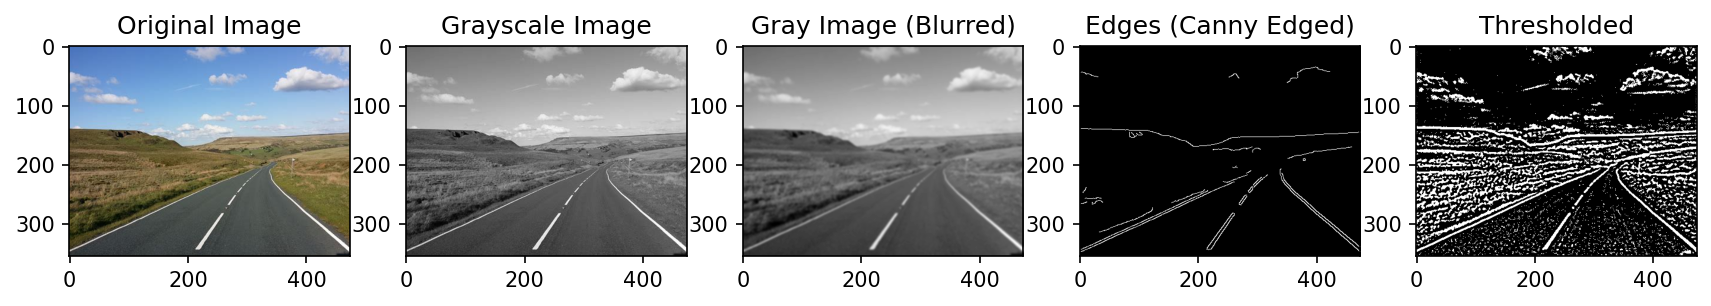

In [5]:
plt.figure(figsize=(14, 14), dpi=150)

plt.subplot(151), plt.imshow(cv.cvtColor(road_img, cv.COLOR_BGR2RGB)), plt.title(
    "Original Image"
)
plt.subplot(152), plt.imshow(road_img_gray, "gray"), plt.title("Grayscale Image")
plt.subplot(153), plt.imshow(road_img_gray_blurred, "gray"), plt.title(
    "Gray Image (Blurred)"
)
plt.subplot(154), plt.imshow(road_img_canny_edged, "gray"), plt.title(
    "Edges (Canny Edged)"
)
plt.subplot(155), plt.imshow(road_img_thresholded, "gray"), plt.title("Thresholded")

plt.show()

In [6]:
# returns (n, 1, 2) shaped array

hough_lines_canny = cv.HoughLines(road_img_canny_edged, 1, np.pi / 180, 120)
hough_lines_thresholded = cv.HoughLines(road_img_thresholded, 1, np.pi / 180, 220)

In [7]:
def draw_hough_lines(img, hough_lines):
    hough_lines_drawn_img = img.copy()
    hough_lines = hough_lines.squeeze()

    for line in hough_lines:
        rho, theta = line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        #  print(x1, y1, x2, y2)
        cv.line(hough_lines_drawn_img, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return hough_lines_drawn_img

In [8]:
hough_lines_canny_img = draw_hough_lines(road_img, hough_lines_canny)
hough_lines_thresholded_img = draw_hough_lines(road_img, hough_lines_thresholded)

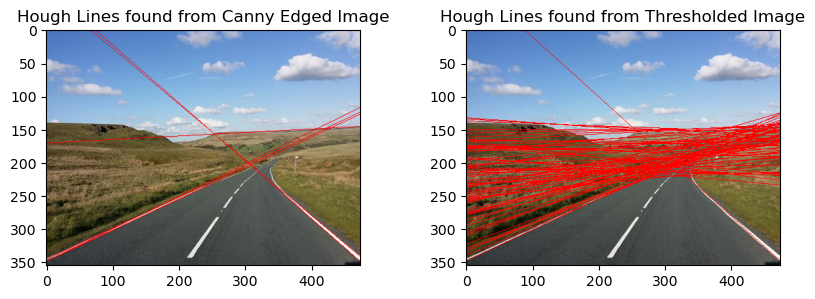

In [9]:
plt.figure(figsize=(8, 3))

plt.subplot(121), plt.imshow(
    cv.cvtColor(hough_lines_canny_img, cv.COLOR_BGR2RGB)
), plt.title("Hough Lines found from Canny Edged Image")
plt.subplot(122), plt.imshow(
    cv.cvtColor(hough_lines_thresholded_img, cv.COLOR_BGR2RGB)
), plt.title("Hough Lines found from Thresholded Image")

plt.tight_layout(w_pad=5)
plt.show()

#### *Probabilistic Hough Lines*

A Hough Transform is considered probabilistic if it uses random sampling of the edge points. Probabilistic hough line is used inplace of classic hough line due to its reduced computational power requirement.

> The `cv.HoughLinesP(image, rho, theta, threshold)` function is used for probabilistic hough line detection.

In [10]:
# returns an array of shape (n, 1, 4)
hough_lines_canny_P = cv.HoughLinesP(road_img_canny_edged, 1, np.pi / 180, 120)

In [11]:
def draw_probabilistic_hough_lines(img, probabilistic_hough_lines):
    probabilistic_hough_lines_drawn_img = img.copy()
    probabilistic_hough_lines = probabilistic_hough_lines.squeeze()

    for line in probabilistic_hough_lines:
        x1, y1, x2, y2 = line
        cv.line(probabilistic_hough_lines_drawn_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return probabilistic_hough_lines_drawn_img

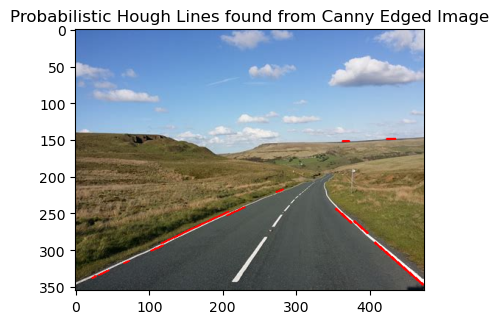

In [12]:
hough_lines_canny_P_img = draw_probabilistic_hough_lines(road_img, hough_lines_canny_P)
matplotlib_imshow(
    "Probabilistic Hough Lines found from Canny Edged Image", hough_lines_canny_P_img, 6
)

- ### Hough transform for detecting circles ([Docs](https://docs.opencv.org/4.7.0/da/d53/tutorial_py_houghcircles.html))

> The `cv.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius)` function is used for detecting circles in a grayscale image using the Hough transform.

<u>Function Parameters</u>

- image: 8 bit single-channel, binary source image.
- method: Detection method, see HoughModes. The available methods are *cv.HOUGH_GRADIENT* and *cv.HOUGH_GRADIENT_ALT*.
- dp: Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height. For HOUGH_GRADIENT_ALT the recommended value is dp=1.5, unless some small very circles need to be detected.
- minDist: Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
- param1: First method-specific parameter. In case of HOUGH_GRADIENT and HOUGH_GRADIENT_ALT, it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). Note that HOUGH_GRADIENT_ALT uses Scharr algorithm to compute image derivatives, so the threshold value should normally be higher, such as 300 or normally exposed and contrasty images.
- param2: Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first. In the case of HOUGH_GRADIENT_ALT algorithm, this is the circle "perfectness" measure. The closer it to 1, the better shaped circles algorithm selects. In most cases 0.9 should be fine. If you want get better detection of small circles, you may decrease it to 0.85, 0.8 or even less. But then also try to limit the search range [minRadius, maxRadius] to avoid many false circles.
- minRadius: Minimum circle radius.
- maxRadius: Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, HOUGH_GRADIENT returns centers without finding the radius. HOUGH_GRADIENT_ALT always computes circle radiuses.

**Returns:** Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes)

**Note:** 
1. Usually the function detects the centers of circles well. However, it may fail to find correct radii. You can assist the function by specifying the radius range ( minRadius and maxRadius ) if you know it. Or, in the case of HOUGH_GRADIENT method you may set maxRadius to a negative number to return centers only without radius search, and find the correct radius using an additional procedure.

2. It also helps to smooth image a bit unless it's already soft. For example, **GaussianBlur() with 7x7 kernel and 1.5x1.5 sigma** or similar blurring may help.

<img src="./imgs/hough_circle_opencv.png">

> ##### In the following example we will try to detect circles from the 'bicycle.jpeg' image.

In [13]:
bicycle_img = cv.imread("./imgs/bicycle.jpeg")
bicycle_img_gray = cv.cvtColor(bicycle_img, cv.COLOR_BGR2GRAY)
bicycle_img_gray_blur = cv.GaussianBlur(bicycle_img_gray, (5, 5), 1.5)

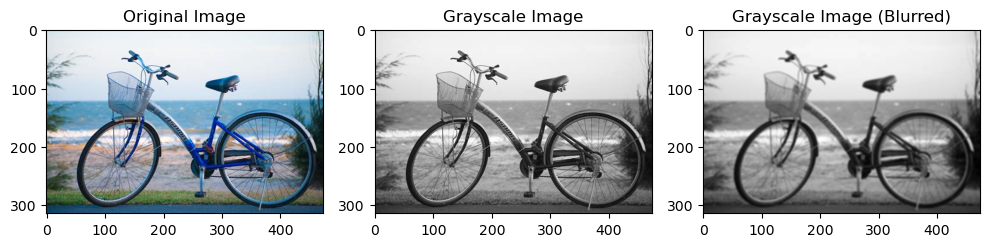

In [14]:
plt.figure(figsize=(10, 4))

plt.subplot(131), plt.imshow(cv.cvtColor(bicycle_img, cv.COLOR_BGR2RGB)), plt.title(
    "Original Image"
)
plt.subplot(132), plt.imshow(bicycle_img_gray, "gray"), plt.title("Grayscale Image")
plt.subplot(133), plt.imshow(bicycle_img_gray_blur, "gray"), plt.title(
    "Grayscale Image (Blurred)"
)

plt.tight_layout()
plt.show()

In [15]:
bicycle_hough_circles = cv.HoughCircles(
    bicycle_img_gray_blur,
    cv.HOUGH_GRADIENT,
    dp=1.2,
    minDist=75,
    param1=180,
    param2=60,
    minRadius=60,
)

In [16]:
bicycle_hough_circles.shape

(1, 2, 3)

In [17]:
def draw_hough_circles(img, hough_circles):
    hough_circles_drawn_img = img.copy()
    hough_circles = hough_circles.squeeze(axis=0)
    hough_circles = hough_circles.astype(np.uint16)

    for circle in hough_circles:
        x_center, y_center, radius = circle

        # draw the center of the circle
        cv.circle(hough_circles_drawn_img, (x_center, y_center), 5, (0, 0, 255), -1)

        # draw the detected circle
        cv.circle(hough_circles_drawn_img, (x_center, y_center), radius, (0, 0, 255), 2)

    return hough_circles_drawn_img

In [18]:
hough_circles_img = draw_hough_circles(bicycle_img, bicycle_hough_circles)

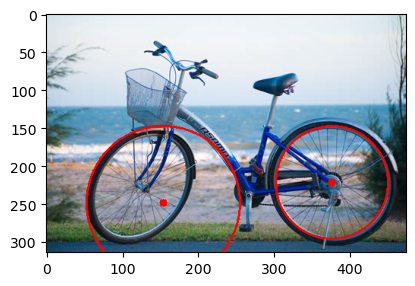

In [19]:
matplotlib_imshow("", hough_circles_img)